In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats

In [21]:
df = pd.read_csv('data/weatherAUS.csv')
rain = df.head(30000).copy()
print(f'The number of rows are {rain.shape[0] } and the number of columns are {rain.shape[1]}')

The number of rows are 30000 and the number of columns are 23


In [22]:
categorical_col = []
contin_val=[]

for columnn in rain.columns:
    if rain[columnn].dtype == 'object':
        categorical_col.append(columnn)
    else:
        contin_val.append(columnn)
        
print(categorical_col)
print(contin_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [23]:
rain = rain.drop(columns=['Date'], axis=1)
rain['RainTomorrow'] = rain['RainTomorrow'].map({'Yes': 1, 'No': 0})    
rain['RainToday'] = rain['RainToday'].map({'Yes': 1, 'No': 0})

In [24]:
rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp']=rain['MinTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['Evaporation']=rain['Evaporation'].fillna(rain['Evaporation'].mean())
rain['Sunshine']=rain['Sunshine'].fillna(rain['Sunshine'].mean())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mean())
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

rain.isnull().sum()


Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      3846
WindGustSpeed       0
WindDir9am       4378
WindDir3pm       2064
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         678
RainTomorrow      678
dtype: int64

In [25]:
rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])

rain.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

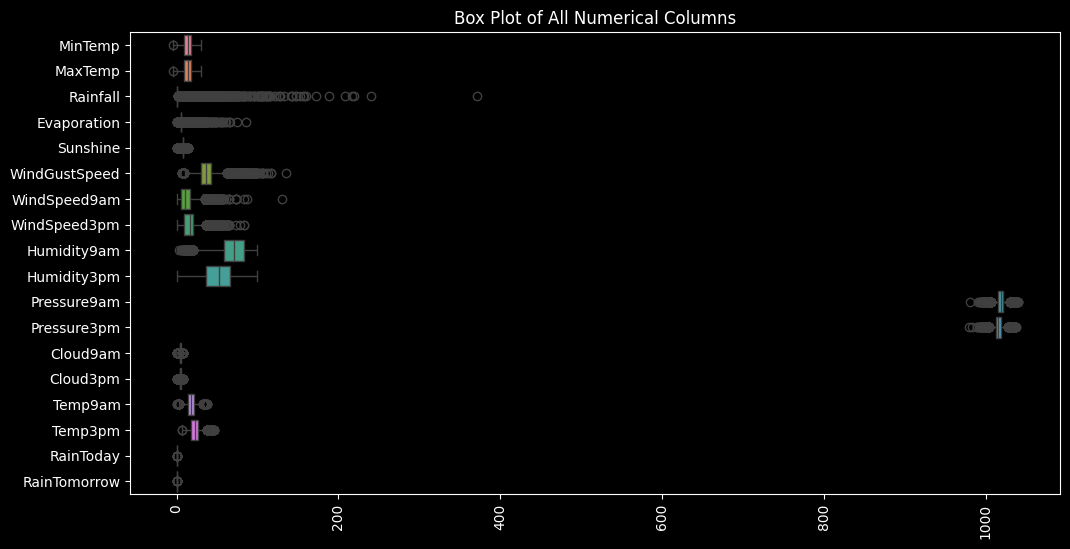

In [26]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=rain, orient='h')
plt.title('Box Plot of All Numerical Columns')
plt.xticks(rotation=90)
plt.show()

In [27]:
l_encoder = preprocessing.LabelEncoder()
rain['Location'] = l_encoder.fit_transform(rain['Location'])
rain['WindGustDir'] = l_encoder.fit_transform(rain['WindGustDir'])
rain['WindDir9am'] = l_encoder.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = l_encoder.fit_transform(rain['WindDir3pm'])
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,13.4,13.4,0.6,5.757227,7.811786,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.452521,16.9,21.8,0.0,0.0
1,0,7.4,7.4,0.0,5.757227,7.811786,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.327575,4.452521,17.2,24.3,0.0,0.0
2,0,12.9,12.9,0.0,5.757227,7.811786,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.327575,2.000000,21.0,23.2,0.0,0.0
3,0,9.2,9.2,0.0,5.757227,7.811786,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.327575,4.452521,18.1,26.5,0.0,0.0
4,0,17.5,17.5,1.0,5.757227,7.811786,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


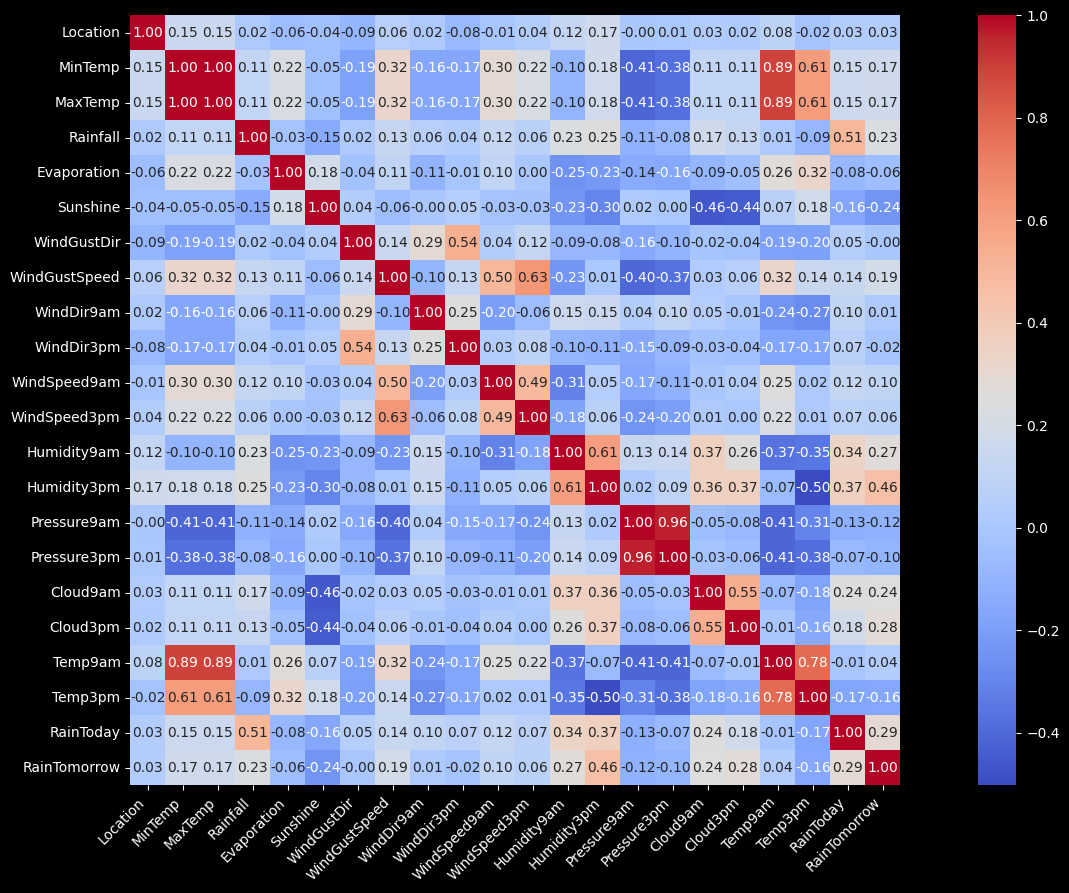

In [28]:

plt.figure(figsize=(20,10))
ax = sns.heatmap(rain.corr(), annot=True, square=True, cmap='coolwarm', fmt='.2f')  
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

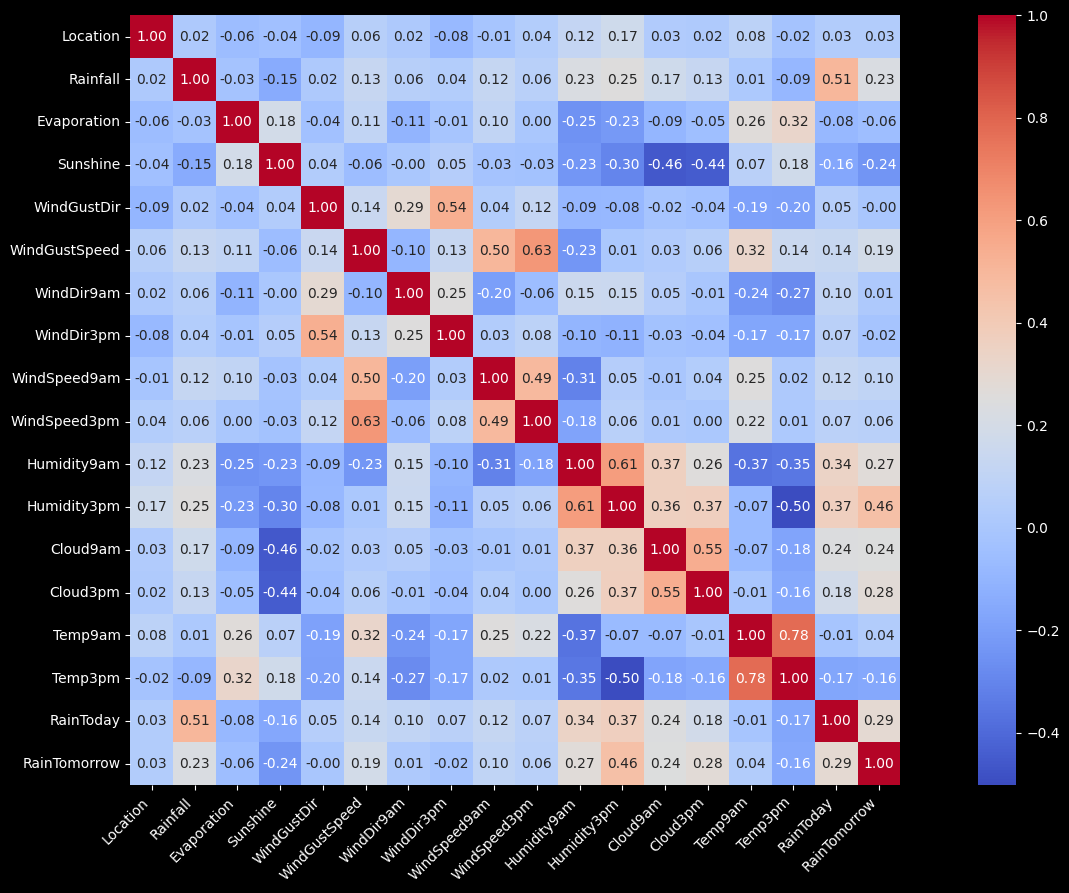

In [29]:
rain=rain.drop(['Pressure9am', 'Pressure3pm', 'MaxTemp', 'MinTemp'],axis=1)
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
ax = sns.heatmap(rain.corr(), annot=True, square=True, cmap='coolwarm', fmt='.2f')  
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

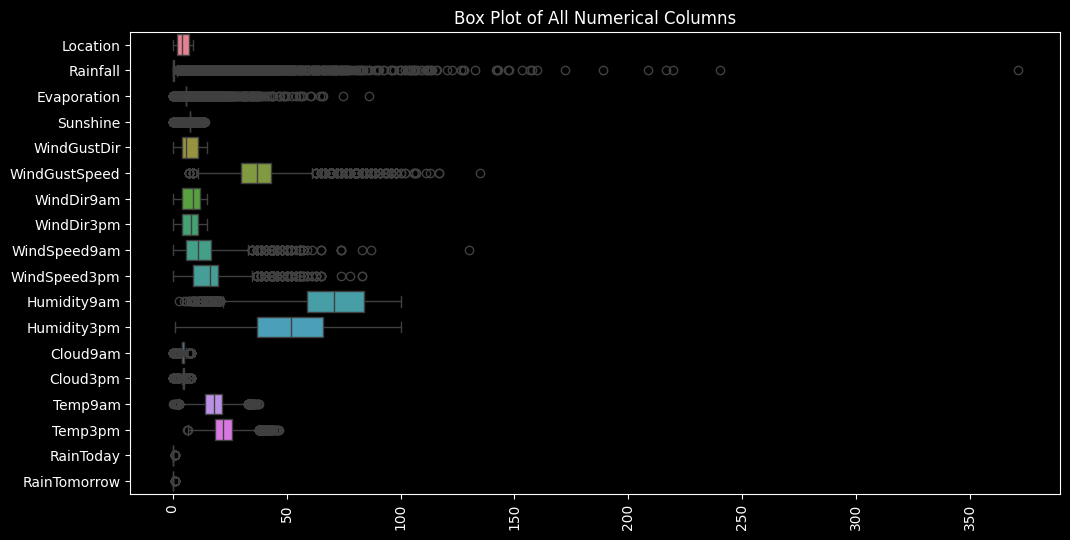

In [30]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=rain, orient='h')
plt.title('Box Plot of All Numerical Columns')
plt.xticks(rotation=90)
plt.show()

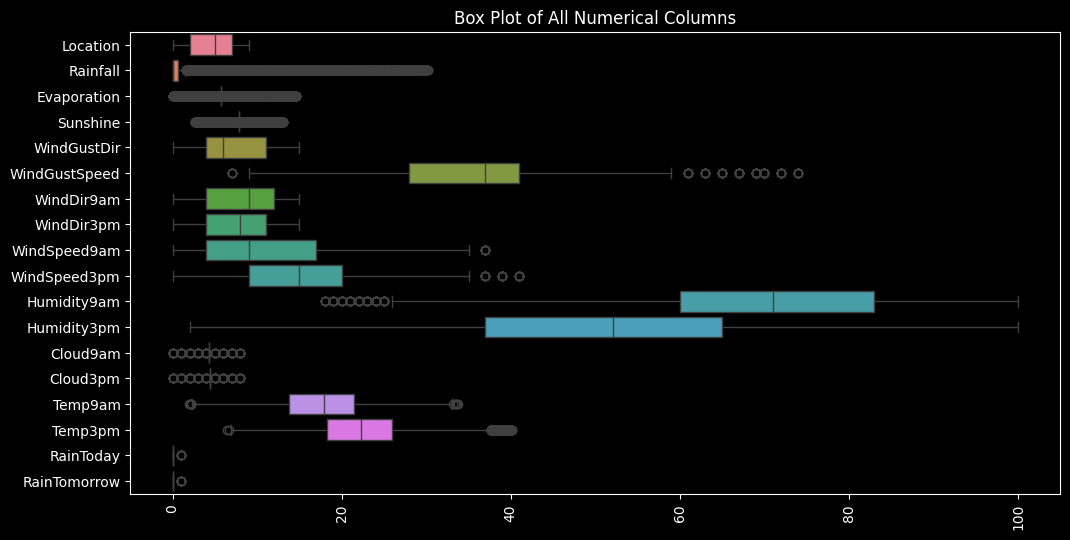

In [31]:
rain = rain[(np.abs(stats.zscore(rain)) < 3).all(axis=1)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=rain, orient='h')
plt.title('Box Plot of All Numerical Columns')
plt.xticks(rotation=90)
plt.show()

In [32]:
df = pd.read_csv('data/weatherAUS.csv')
df = df.head(20000)
df.to_csv('data/train.csv', index=False)
df = pd.read_csv('data/weatherAUS.csv')
df = df.tail(10000)
df.to_csv('data/val.csv', index=False)

In [33]:
df_train = pd.read_csv('data/weatherAUS.csv')
#df_train = df_train.head(21800)
numerical_features = []
        
for col in df_train.columns:
    if df_train[col].dtype != 'object':
        numerical_features.append(col)

for col in numerical_features:
        df_train[col] = df_train[col].fillna(df_train[col].mean())  
      
df_train = df_train[(np.abs(stats.zscore(df_train[numerical_features])) < 3).all(axis=1)]

df_train["RainToday"] = df_train["RainToday"].map({'Yes': 1, 'No': 0})
if df_train["RainToday"].isnull().any():
    df_train["RainToday"] = df_train["RainToday"].fillna(df_train["RainToday"].mode()[0])

df_train['RainTomorrow'] = df_train['RainTomorrow'].map({'Yes': 1, 'No': 0})
if df_train['RainTomorrow'].isnull().any():
    df_train['RainTomorrow'] = df_train['RainTomorrow'].fillna(df_train['RainTomorrow'].mode()[0])
    

df_train.to_csv('data/train.csv', index=False)
print(f'The number of rows are {df_train.shape[0] } and the number of columns are {df_train.shape[1]}')

The number of rows are 136608 and the number of columns are 23


In [34]:
df_val = pd.read_csv('data/weatherAUS.csv')
#df_val = df_val.tail(10800)
numerical_features = []
        
for col in df_val.columns:
    if df_val[col].dtype != 'object':
        numerical_features.append(col)

for col in numerical_features:
        df_val[col] = df_val[col].fillna(df_val[col].mean())  
      
df_val = df_val[(np.abs(stats.zscore(df_val[numerical_features])) < 3).all(axis=1)]

df_val["RainToday"] = df_val["RainToday"].map({'Yes': 1, 'No': 0})
if df_val["RainToday"].isnull().any():
    df_val["RainToday"] = df_val["RainToday"].fillna(df_val["RainToday"].mode()[0])
    
df_val["RainTomorrow"] = df_val["RainTomorrow"].map({'Yes': 1, 'No': 0})
if df_val["RainTomorrow"].isnull().any():
    df_val["RainTomorrow"] = df_val["RainTomorrow"].fillna(df_val["RainTomorrow"].mode()[0])
    
df_val.to_csv('data/val.csv', index=False)
print(f'The number of rows are {df_val.shape[0] } and the number of columns are {df_val.shape[1]}')

The number of rows are 136608 and the number of columns are 23


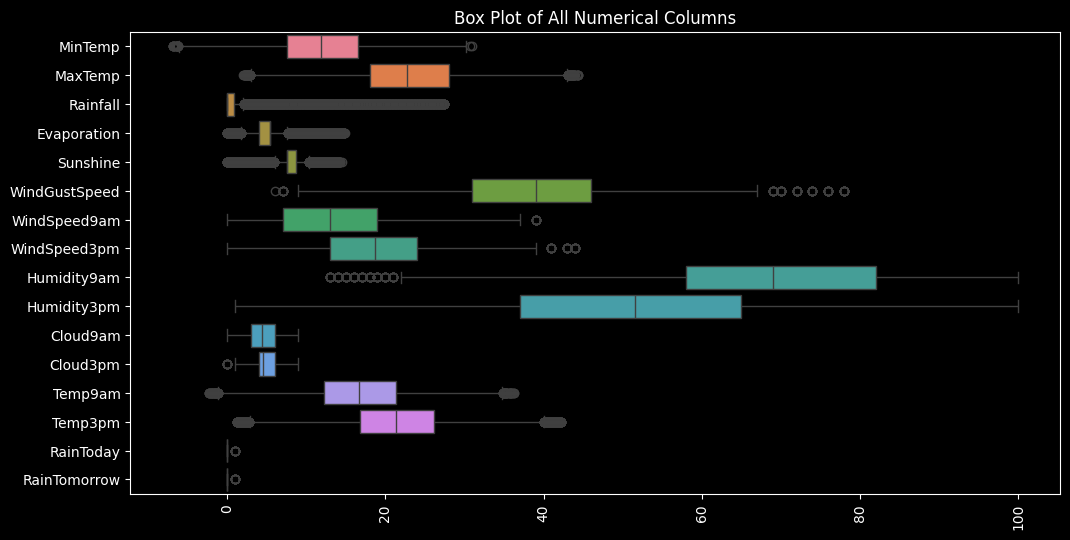

In [35]:
cols_to_plot = [col for col in df_train.columns if col not in ["Pressure9am", "Pressure3pm"]]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train[cols_to_plot], orient='h')
plt.title('Box Plot of All Numerical Columns')
plt.xticks(rotation=90)
plt.show()

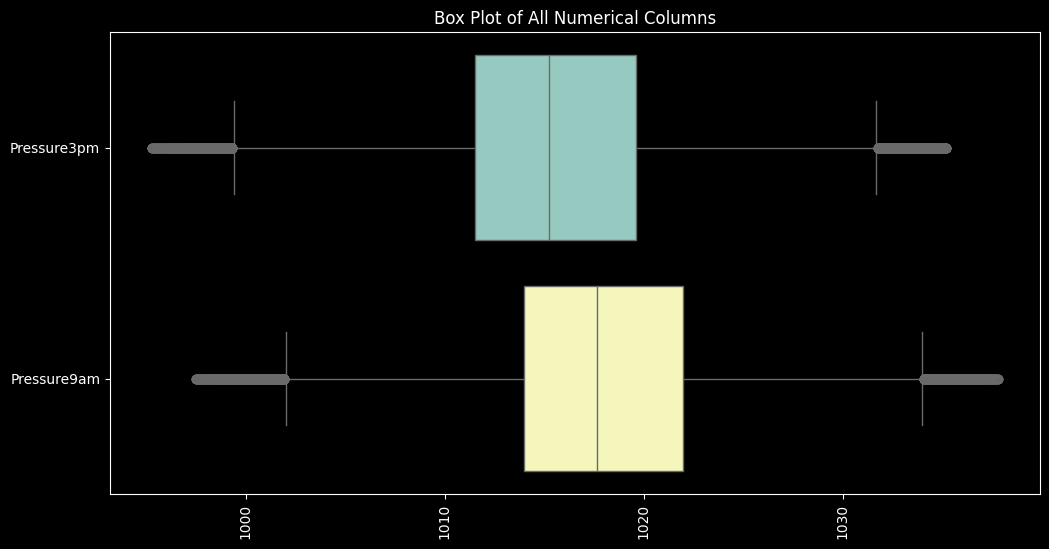

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train[["Pressure3pm", "Pressure9am"]], orient='h')
plt.title('Box Plot of All Numerical Columns')
plt.xticks(rotation=90)
plt.show()

columns are Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
rain Tommoow 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainTomorrow, Length: 136608, dtype: float64


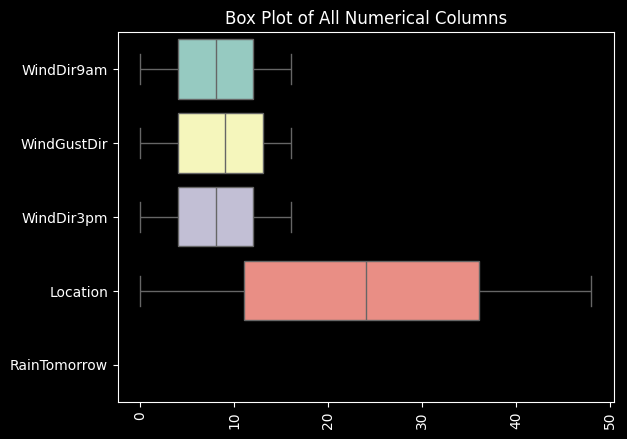

In [37]:
le = preprocessing.LabelEncoder()
df_train['WindDir9am'] = le.fit_transform(df_train['WindDir9am'])
df_train['WindGustDir'] = le.fit_transform(df_train['WindGustDir'])
df_train['WindDir3pm'] = le.fit_transform(df_train['WindDir3pm'])
df_train['Location'] = le.fit_transform(df_train['Location'])
print(f"columns are {df_train.columns}")

print(f'rain Tommoow {df_train["RainTomorrow"]}')

df_train['RainTomorrow'] = df_train['RainTomorrow'].map({'Yes': 1, 'No': 0})

sns.boxplot(data=df_train[["WindDir9am", "WindGustDir", "WindDir3pm", "Location", "RainTomorrow"]], orient='h')
plt.title('Box Plot of All Numerical Columns')
plt.xticks(rotation=90)
plt.show()

In [44]:
import os
import json
new_path = "D:\\Max\\ml\\DataRoot\\docker-flask"
current_pythonpath = os.environ.get("PYTHONPATH", "")
if new_path not in current_pythonpath:
    new_pythonpath = current_pythonpath + ";" + new_path if current_pythonpath else new_path
    os.environ["PYTHONPATH"] = new_pythonpath
print("Updated PYTHONPATH:", os.environ["PYTHONPATH"])

from utils.trainer import Estimator
from utils.dataloader import DataLoader
from utils.predictor import Predictor
from sklearn.metrics import accuracy_score
import pickle
with open('settings/specifications.json') as f:
    specifications = json.load(f)
    
description = specifications['description']   

train_set = pd.read_csv('data/train.csv')
dl = DataLoader()
train_set = dl.fit(train_set)
train_set = dl.load_data()

y = train_set[description['y']].astype(int)
X = train_set[description['final_columns']]

trainer = Estimator()

trained_model = trainer.fit(X, y)
with open('./models/XGBClassifier.pickle', 'wb') as f:
    pickle.dump(trained_model, f)
prediction = trainer.predict(trained_model, X)
print(f"prediction 1 : {prediction[:35]}")

predictor = Predictor()
prediction2 = predictor.predict(X)
print(f"prediction 2 : {prediction2[:35]}")
print(f"real         : {y.values[:35]}")

print ("The accuracy of XGB1 is : ", accuracy_score(y, prediction)*100, "%")
print ("The accuracy of XGB2 is : ", accuracy_score(y, prediction2)*100, "%")

Updated PYTHONPATH: D:\Max\ml\DataRoot\docker-flask
prediction 1 : [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
data is a dataframe: True
prediction: [0 0 0 ... 1 0 0]
prediction 2 : [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
real         : [0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
The accuracy of XGB1 is :  93.9846223428313 %
The accuracy of XGB2 is :  93.9846223428313 %


In [45]:
df_train = pd.read_csv('data/weatherAUS.csv')
df_train = df_train.head(21800)
numerical_features = []
        
for col in df_train.columns:
    if df_train[col].dtype != 'object':
        numerical_features.append(col)

for col in numerical_features:
        df_train[col] = df_train[col].fillna(df_train[col].mean())  
      
df_train = df_train[(np.abs(stats.zscore(df_train[numerical_features])) < 3).all(axis=1)]

df_train["RainToday"] = df_train["RainToday"].map({'Yes': 1, 'No': 0})
if df_train["RainToday"].isnull().any():
    df_train["RainToday"] = df_train["RainToday"].fillna(df_train["RainToday"].mode()[0])

df_train['RainTomorrow'] = df_train['RainTomorrow'].map({'Yes': 1, 'No': 0})
if df_train['RainTomorrow'].isnull().any():
    df_train['RainTomorrow'] = df_train['RainTomorrow'].fillna(df_train['RainTomorrow'].mode()[0])
    

df_train.to_csv('data/train.csv', index=False)
print(f'The number of rows are {df_train.shape[0] } and the number of columns are {df_train.shape[1]}')

The number of rows are 19899 and the number of columns are 23


In [46]:
df_val = pd.read_csv('data/weatherAUS.csv')
df_val = df_val.tail(10800)
numerical_features = []
        
for col in df_val.columns:
    if df_val[col].dtype != 'object':
        numerical_features.append(col)

for col in numerical_features:
        df_val[col] = df_val[col].fillna(df_val[col].mean())  
      
df_val = df_val[(np.abs(stats.zscore(df_val[numerical_features])) < 3).all(axis=1)]

df_val["RainToday"] = df_val["RainToday"].map({'Yes': 1, 'No': 0})
if df_val["RainToday"].isnull().any():
    df_val["RainToday"] = df_val["RainToday"].fillna(df_val["RainToday"].mode()[0])
    
df_val["RainTomorrow"] = df_val["RainTomorrow"].map({'Yes': 1, 'No': 0})
if df_val["RainTomorrow"].isnull().any():
    df_val["RainTomorrow"] = df_val["RainTomorrow"].fillna(df_val["RainTomorrow"].mode()[0])
    
df_val.to_csv('data/val.csv', index=False)
print(f'The number of rows are {df_val.shape[0] } and the number of columns are {df_val.shape[1]}')

The number of rows are 9987 and the number of columns are 23
